<a href="https://colab.research.google.com/github/mancuso68/dsnp_projetos/blob/main/Analisando_os_Dados_do_Airbnb_Sydney_Australia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 2.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Sydney - Austrália*
*`por Luciano Mancuso da Cunha`*

A análise que será apresentada a seguir, não representa um trabalho de Data Science aprofundado com machine learning e análises preditivas, mas uma visão introdutória dos poderes que essa Ciência pode oferecer.

O objeto de pesquisa foi o  [Airbnb](https://www.airbnb.com.br/) que hoje é considerado a **maior empresa hoteleira da atualidade**. Um detalhe importante é que ele **não possui nenhum hotel**!

O Airbnb possui uma base de dados compartilhada com informações das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

O Dataset a ser utilizado possui pouco mais de 30 mil entradas, mas já será o suficiente para uma análise estatística.

A cidade escolhida para essa análise foi **Sydney, Austrália** e o dataset a ser utilizado possui pouco mais de 30 mil entradas. A motivação para a escolha dessa cidade foi a lembrança de uma viagem feita em fevereiro de 1996, numa época que o Airbnb ainda não existia, na verdade, os celulares eram usados apenas aparelhos para chamadas telefônica.

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Sydney na Austrária, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


In [ ]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

###Sydney, Austrália
Uma cidade que tive a oportunidade de conhecer em fevereiro de 1996. Nessa época eu estava iniciando o uso da internet através de modem discado. Nem imaginava que um dia existiria o **Airbnb**. Teria facilitado muito a minha vida de mochileiro **"Backpacker"** da época.

In [ ]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/australia/nsw/sydney/2020-12-14/visualisations/listings.csv")

## Análise dos Dados


**Dicionário das variáveis**

* `id` - Número de Id, identificação única do Imóvel. Provavelmente Chave Primária de uma tabela
* `name` - Nome da propriedade
* `host_id` - Número de Id do priprietário
* `host_name` - Nome do proprietário
* `neighbourhood_group` - Esse campo não será usado no trabalho. Está preenchido com valores nulos
* `neighbourhood` - Barro onde o imóvel está localizado
* `latitude` - Coordenada GPS da latitude do imóvel
* `longitude` - Coordenada GPS de longitude do imóvel
* `room_type`- Tipo de imóvel oferecido para locação
* `price` - Preço de aluguel do imóvel
* `minimum_nights` - Quantidade mínima de diárias para locação
* `number_of_reviews` - Número de avaliações
* `last_review`- Data da última avaliação
* `reviews_per_month`- Avaliações por mês
* `calculated_host_listings_count` - Contágem de Imóveis do mesmo proprietário
* `availability_365`- dias diaponiveis no interválo de um ano

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [ ]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,11156,An Oasis in the City,40855,Colleen,NaN,Sydney,-33.86934,151.22688,Private room,65,2,196,2020-03-13,1.46,1,364
1,12351,Sydney City & Harbour at the door,17061,Stuart,NaN,Sydney,-33.86515,151.19190,Private room,14315,2,526,2019-09-22,4.15,2,0
2,14250,Manly Harbour House,55948,Heidi,NaN,Manly,-33.80093,151.26172,Entire home/apt,470,5,2,2019-01-02,0.03,2,45
3,15253,Unique Designer Rooftop Apartment in City Loca...,59850,Morag,NaN,Sydney,-33.87964,151.21680,Private room,97,2,365,2020-11-14,3.40,1,340
4,44545,Sunny Darlinghurst Warehouse Apartment,112237,Atari,NaN,Sydney,-33.87888,151.21439,Entire home/apt,130,3,76,2020-01-03,0.61,1,0


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [ ]:
# identificar o volume de dados do DataFrame
print("Entradas (Total de Registros): \t {}".format(df.shape[0]))
print("Variáveis ou Campos: \t {}".format(df.shape[1]))

Entradas (Total de Registros): 	 33871
Variáveis ou Campos: 	 16


### O dataset que está sendo avaliado possui **33871** entradas ou registros e **16** colunas, identificadas abaixo pelo nome e tipo de dados

In [ ]:
# verificar as 5 primeiras entradas do dataset (não seriam os tipos de dados dos campos?)
display (df.dtypes)

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**
A verificação dos valores nulos é importante para verificar a qualidade dos dados que serão analizados. Esse procedimento precisa ser feito antes de localizar os *Outliers*.

Abaixo é calculado o percentual de valores nulos existentes em cada coluna. O resultado é o seguinte:
* A coluna `neighbourhood_group`apresenta *100%* de seus valores nulos
* As colunas `reviews_per_month` e `last_reviews` apresentam *29,7%* de seus valores nulos. Não é possível afirmar com precisão, porém a coincidência exata no valor percentual das duas colunas pode sugerir que seriam nas mesmas Entradas (Registros).
* As colunas `name`e `host_name` apresentam menos de *0,1%* de seus valores nulos. 

In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
((df.isnull().sum() / df.shape[0])*100).sort_values(ascending=False)

neighbourhood_group               100.000000
reviews_per_month                  29.697972
last_review                        29.697972
name                                0.035429
host_name                           0.023619
availability_365                    0.000000
calculated_host_listings_count      0.000000
number_of_reviews                   0.000000
minimum_nights                      0.000000
price                               0.000000
room_type                           0.000000
longitude                           0.000000
latitude                            0.000000
neighbourhood                       0.000000
host_id                             0.000000
id                                  0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 
Verificar a distribuição das de cada coluna permite uma visão da existência de Outliers. Para esse projeto serão plotados os histogramas de cada coluna. Outra opção seria plotar o Boxplot que mostraria os quartis e os Outliers.

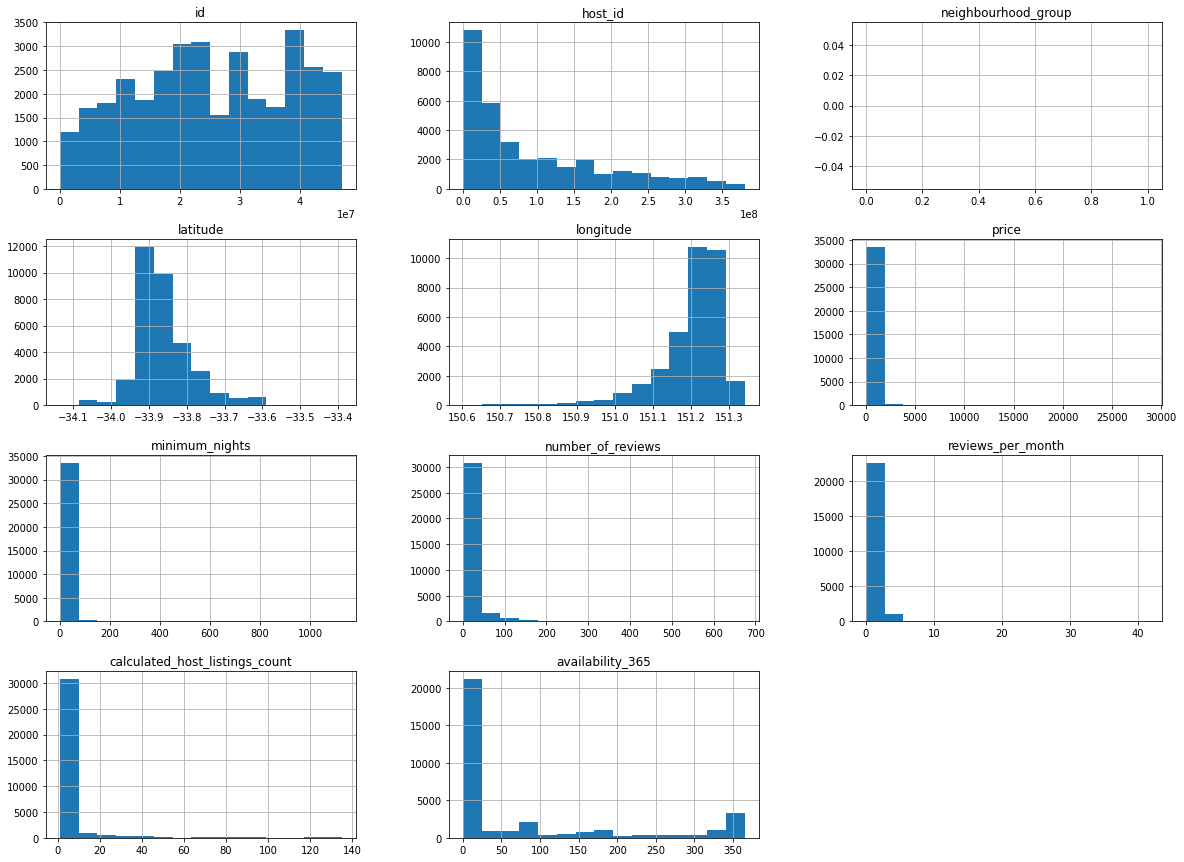

In [ ]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(20,15));

Os histogramas acima permitem verificar algumas características do Dataset:
* A coluna `neighbourhood_group` por conter 100% de seus valores nulos, plotou um histograma em branco
* As colunas `price`, `minimum_nights`, `number_of_reviews`, `reviews_per_month`e `calculated_host_listing_count`apresentaram uma concentração no início do histogramao que demosntra claramente a existência de Ouliers nesses dados
* Cabe ressaltar que os histograma só pode ser feito em colunas que possuem valores numéricos. Com isso, não faz semtido apresentar histograma das colunas `name`, `host_name`,`neighbourhood`, `room_type`e `last_reviews` por se tratarem de colunas do tipo *object*.

### **Q4. Qual a média dos preços de aluguel?**

In [ ]:
# ver a média da coluna `price``
df['price'].describe()

count    33871.000000
mean       228.332585
std        483.786417
min          5.000000
25%         74.000000
50%        124.000000
75%        225.000000
max      28613.000000
Name: price, dtype: float64

Acima foram apresentadas algumas informações estatísticas que facilitam a análise dos dados.
Se for considerada apenas a média dos preços, haverá um valor fora da realidade em função da existência de Outliers.

A média apresentada *228,33* está muito próxima do qualtil que indica 75% dos valores e muito distânte da mediana que é *124,00*.

Uma nova análise, desconsiderando os preços acima de 1500, permite apresentar uma média mãos próxima da realidade.

In [ ]:
df_price = df.copy()
df_price.drop(df_price[df_price.price > 1500].index, axis=0, inplace=True)
df_price['price'].describe()

count    33470.000000
mean       193.242844
std        209.591974
min          5.000000
25%         73.000000
50%        120.000000
75%        219.000000
max       1500.000000
Name: price, dtype: float64

Após uma limpeza nos dados de preços, a média apresentada passa a ser *193,243*

### **Q5. Qual a correlação existente entre as variáveis**

Para fazer uma correlação entre as variáveis (colunas) do dataset, é importante retirar os outliers das colunas `minimum_nights`, `number_of_reviews`, `reviews_per_months` e `calculated_host_listings_count`que apresentaram discrepância em seus histogramas.

In [ ]:
#Conhecendo o range de valores da coluna minimum_nights após limpeza dos dados da coluna price
df_price['minimum_nights'].describe()

count    33470.000000
mean         6.187511
std         30.835645
min          1.000000
25%          1.000000
50%          2.000000
75%          5.000000
max       1125.000000
Name: minimum_nights, dtype: float64

In [ ]:
#Limpando dados da coluna minimum_nights
df_price.drop(df_price[df_price.minimum_nights>30].index, axis=0, inplace=True)
#revendo o Range de valores
df_price['minimum_nights'].describe()

count    32902.000000
mean         3.874992
std          4.384179
min          1.000000
25%          1.000000
50%          2.000000
75%          5.000000
max         30.000000
Name: minimum_nights, dtype: float64

In [ ]:
#Conhecendo o range de valores da coluna number_of_reviews após limpeza dos dados das colunas price e minimum_nights
df_price['number_of_reviews'].describe()

count    32902.000000
mean        14.656373
std         36.637404
min          0.000000
25%          0.000000
50%          2.000000
75%         10.000000
max        674.000000
Name: number_of_reviews, dtype: float64

In [ ]:
#Limpando dados da coluna number_of_reviews
df_price.drop(df_price[df_price.number_of_reviews>200].index, axis=0, inplace=True)
#revendo o Range de valores
df_price['number_of_reviews'].describe()

count    32643.000000
mean        12.584811
std         27.449976
min          0.000000
25%          0.000000
50%          2.000000
75%          9.000000
max        200.000000
Name: number_of_reviews, dtype: float64

In [ ]:
#Conhecendo o range de valores da coluna reviews_per_month após limpeza dos dados das colunas price, minimum_nights e number_of_reviews
df_price['reviews_per_month'].describe()

count    23042.000000
mean         0.611739
std          0.961662
min          0.010000
25%          0.070000
50%          0.190000
75%          0.750000
max         27.150000
Name: reviews_per_month, dtype: float64

In [ ]:
#Limpando dados da coluna number_of_reviews
df_price.drop(df_price[df_price.reviews_per_month>5].index, axis=0, inplace=True)
#revendo o Range de valores
df_price['reviews_per_month'].describe()

count    22917.000000
mean         0.579401
std          0.839985
min          0.010000
25%          0.070000
50%          0.190000
75%          0.740000
max          5.000000
Name: reviews_per_month, dtype: float64

In [ ]:
#Conhecendo o range de valores da coluna calculated_host_listings_count após limpeza dos dados das colunas price, minimum_nights, number_of_reviews e reviews_per_month
df_price['calculated_host_listings_count'].describe()

count    32518.000000
mean         5.188942
std         15.863536
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        135.000000
Name: calculated_host_listings_count, dtype: float64

In [ ]:
#Limpando dados da coluna calculated_host_listings_count
df_price.drop(df_price[df_price.calculated_host_listings_count>15].index, axis=0, inplace=True)
#revendo o Range de valores
df_price['calculated_host_listings_count'].describe()

count    30417.000000
mean         1.887300
std          2.107791
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         15.000000
Name: calculated_host_listings_count, dtype: float64

In [ ]:
#Conhecendo o range de valores da coluna availability_365 após limpeza dos dados das colunas price, minimum_nights, number_of_reviews, reviews_per_month
df_price['availability_365'].describe()

count    30417.000000
mean        72.129697
std        120.942942
min          0.000000
25%          0.000000
50%          0.000000
75%         90.000000
max        365.000000
Name: availability_365, dtype: float64

In [ ]:
# criar uma matriz de correlação
cor_mtz = df_price[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].corr()
# mostrar a matriz de correlação
display(cor_mtz)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.088132,-0.029377,-0.013661,-0.020553,0.098492
minimum_nights,0.088132,1.000000,-0.120970,-0.158258,-0.082065,-0.027900
number_of_reviews,-0.029377,-0.120970,1.000000,0.782941,0.081260,0.166891
reviews_per_month,-0.013661,-0.158258,0.782941,1.000000,0.160113,0.208364
calculated_host_listings_count,-0.020553,-0.082065,0.081260,0.160113,1.000000,0.190197
availability_365,0.098492,-0.027900,0.166891,0.208364,0.190197,1.000000


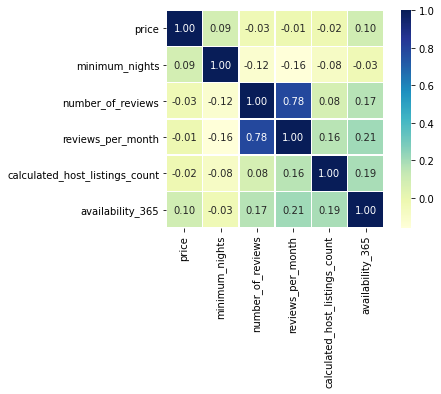

In [ ]:
# plotar um heatmap a partir das correlações
sns.heatmap(cor_mtz, cmap='YlGnBu', fmt='.2f', square=True, linecolor='white', annot=True, linewidths=.5)

### **Q6. Qual o tipo de imóvel mais alugado no Airbnb?**

De acordo com os dados apresentados abaixo, o tipo de imóvel mais alugado é **Entire home/apt** que representa 58,35% do total de imóveis do Dataset.
Os demias estão listados abaixo

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_price.room_type.value_counts()

Entire home/apt    17750
Private room       11903
Shared room          550
Hotel room           214
Name: room_type, dtype: int64

In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível
print((df_price.room_type.value_counts()/df_price.shape[0])*100)

Entire home/apt    58.355525
Private room       39.132722
Shared room         1.808199
Hotel room          0.703554
Name: room_type, dtype: float64


### **Q6. Qual a localidade mais cara de Sydney?**



In [ ]:
# ver preços dos 10 bairros com preço médio mais caros
df_price.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Pittwater           460.505342
Mosman              301.848000
Manly               287.815188
Hunters Hill        280.063830
Warringah           274.464918
Sutherland Shire    237.253521
Woollahra           220.230210
Waverley            211.594540
Leichhardt          205.814341
Lane Cove           198.338235
Name: price, dtype: float64

Como não conheço todos os bairros de Sydney, não sei afirmar se o Bairro Pittwater que apresentou a média de alugueis mais caros é significante na quantidade de locações. O mesmo com relação a muitos outros bairros.

Abaixo segue a relação de todos os bairros com a quantidade de locações e percentual para facilitar essa informação.

In [ ]:
#relacionar as quantidades de locações por bairro.
df_price.groupby(['neighbourhood']).price.count()

neighbourhood
Ashfield             247
Auburn               322
Bankstown            233
Blacktown            271
Botany Bay           579
Burwood              184
Camden                51
Campbelltown          98
Canada Bay           346
Canterbury           326
City Of Kogarah      185
Fairfield             76
Holroyd               98
Hornsby              405
Hunters Hill          47
Hurstville           173
Ku-Ring-Gai          301
Lane Cove            272
Leichhardt           781
Liverpool            129
Manly               1488
Marrickville        1061
Mosman               375
North Sydney        1032
Parramatta           485
Penrith              152
Pittwater            936
Randwick            2788
Rockdale             795
Ryde                 552
Strathfield          166
Sutherland Shire     497
Sydney              6948
The Hills Shire      276
Warringah           1639
Waverley            4432
Willoughby           433
Woollahra           1238
Name: price, dtype: int64

In [ ]:
#Relacionar o percentual de imóveis disponíveis por bairo em relação a todos os imóveis disponíveis
print(df_price.groupby(['neighbourhood']).price.count()/df_price.shape[0]*100)

neighbourhood
Ashfield             0.812046
Auburn               1.058619
Bankstown            0.766019
Blacktown            0.890949
Botany Bay           1.903541
Burwood              0.604925
Camden               0.167669
Campbelltown         0.322188
Canada Bay           1.137522
Canterbury           1.071769
City Of Kogarah      0.608213
Fairfield            0.249860
Holroyd              0.322188
Hornsby              1.331492
Hunters Hill         0.154519
Hurstville           0.568761
Ku-Ring-Gai          0.989578
Lane Cove            0.894237
Leichhardt           2.567643
Liverpool            0.424105
Manly                4.892001
Marrickville         3.488181
Mosman               1.232863
North Sydney         3.392840
Parramatta           1.594503
Penrith              0.499721
Pittwater            3.077227
Randwick             9.165927
Rockdale             2.613670
Ryde                 1.814775
Strathfield          0.545747
Sutherland Shire     1.633955
Sydney              22.842

Os números apresentados mostram que os bairros mais caros possuem representação inferior a 5% cada na amostragem total. Dos bairros representam percentuais anaixo de 5%, dos 10 bairros com valores médios de aluguel mais altos, *Hunters Hill* realmente possui quantidade equivalente a 0,15%. Por outro lado *Waverley* apresentou um percentual de 14,57%, ficando abaixo a penas do bairro Sydney que acredito ser generalizado.
Por fim, exceto os bairros de *Hunters Hill* e *Lane Cove*, os bairros com maior média de aluguel possuem uma quantidade aceitável de imóveis em relação aos outros bairros.

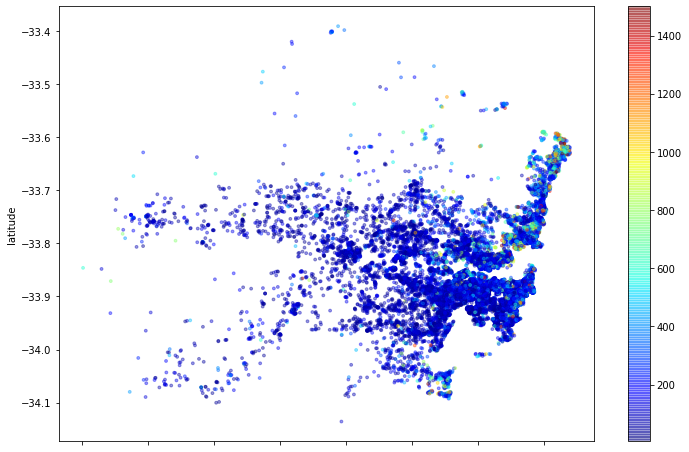

In [ ]:
# plotar os imóveis pela latitude-longitude
df_price.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_price['price'], s=8, cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

A média da coluna *minimum_nights* é 3,91

In [ ]:
# ver a média da coluna `minimum_nights``
df_price['minimum_nights'].describe()

count    30417.000000
mean         3.908209
std          4.411462
min          1.000000
25%          1.000000
50%          2.000000
75%          5.000000
max         30.000000
Name: minimum_nights, dtype: float64

## Conclusões


A análise aqui apresentada utilizou um *dataset* de informações do *Airbnb* com 33871 entradas referentes à cidade de **Sydney, Austrália**.

Após conhecer a estrutura das colunas e os tipos de dados desse *dataset*, passou-se a uma verificação dos dados contidos na busca por possíveis *outliers* e dados nulos. Uma limpeza dos dados permitiu a realização da análise estatística dos aluguéis com relação a volume, preços, distribuição dos imóveis, tempo mínimo e uma correlação das informações.

Por fim, cabe ressaltar que para essa análise foi escolhido o menor *dataset* de informações. Uma análise semelhante ou até mais aprofundada com o *dataset* contendo mais de 7 milhões de entradas, encontrado no mesmo repositório da *Airbnb*, seria interessante.

